# Highway traffic analysis

In this project, my goal is to find some heavy traffic indicators(weather, time of the day/week, etc.) on Interstate 94 Highway (Located in USA).
You can find the data set here : [https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)<br>

See below the description of each column : 
- **holiday** : Categorical US National holidays plus regional holiday, Minnesota State Fair 
* **temp** : Numeric Average temp in kelvin 
* **rain_1h** : Numeric Amount in mm of rain that occurred in the hour 
* **snow_1h** : Numeric Amount in mm of snow that occurred in the hour 
* **clouds_all** : Numeric Percentage of cloud cover 
* **weather_main** : Categorical Short textual description of the current weather 
* **weather_description** : Categorical Longer textual description of the current weather 
* **date_time** : DateTime Hour of the data collected in local CST time 
* **traffic_volume** : Numeric Hourly I-94 ATR 301 reported westbound traffic volume

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataframe has 9 columns and 48204 rows
There is no missing values. 

In [3]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## Histogram of the traffic volume

Text(0.5, 1.0, 'Traffic Volume')

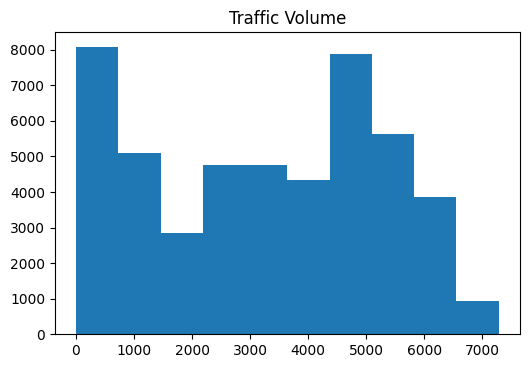

In [4]:
plt.hist(traffic['traffic_volume'])
plt.title('Traffic Volume')

In [5]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

- 25% of the time, there is less than 1193 cars per hour passing the station 
- Also 25% of the time, the station counts more than 4933 cars per hour, with a maximum of 7280 cars per hour. 


## Influence of daytime/nightime on traffic volume

In [6]:
type(traffic['date_time'][0])

str

The date_time column stores string values. <br> we need to convert them into datetime type to make them easier to analyse :

In [7]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [8]:
type(traffic['date_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
hours = traffic['date_time'].dt.hour
traffic['hours'] = hours

In [10]:
# lets isolate daytime and nightime
daytime_data = traffic[ (7 <= traffic['hours']) & (traffic['hours'] <19)]
nightime_data = traffic[ (19 <= traffic['hours']) | (traffic['hours'] < 7)]

In [11]:
daytime_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hours
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13
...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,15
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,15
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,16
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,17


In [12]:
nightime_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hours
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539,19
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784,20
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361,21
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529,22
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963,23
...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22


In [13]:
# Lets look at the influence on the traffic volume :

(0.0, 8000.0)

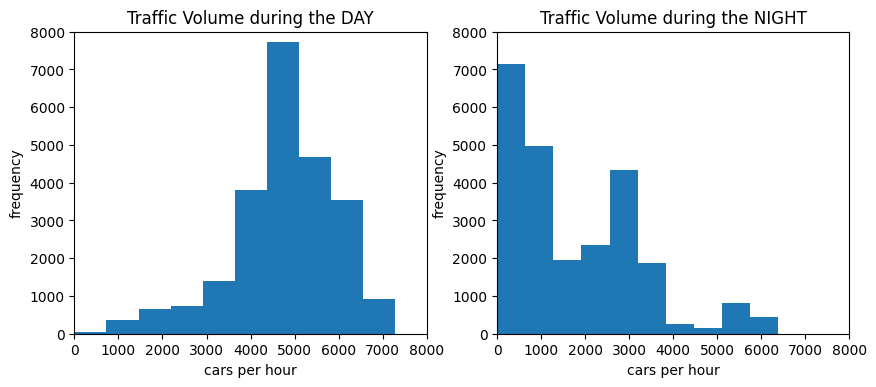

In [14]:
plt.figure(figsize=(10,4))
# for daytime
plt.subplot(1, 2, 1)
plt.hist(daytime_data['traffic_volume'])
plt.title('Traffic Volume during the DAY')
plt.xlabel('cars per hour')
plt.ylabel('frequency')
plt.xlim([0,8000])
plt.ylim([0,8000])

# for nightime
plt.subplot(1, 2, 2)
plt.hist(nightime_data['traffic_volume'])
plt.title('Traffic Volume during the NIGHT')
plt.xlabel('cars per hour')
plt.ylabel('frequency')
plt.xlim([0,8000])
plt.ylim([0,8000])

From the histograms above, we can make these observations : 
- **Traffic volume during the day** : <br>
  - The histogram is right skewed <br>
  - Most of the time, there is between 4000 and 6500 cars/h
  - It is quite rare to have less than 3000 cars/h or more than 6500 cars/h
  - The traffic is quite heavy during the day


- **Traffic volume during the day** : 
  - The histogram of traffic volume during night dont match any particular distribution<br>
  - Most of the time, there is either less than 1000 cars/h or 3000 cars/h<br>
  - It is uncommon to have more than 4000 cars/h
  - The traffic is quite light during the night
    

Because the goal of this project is to find indicators of heavy traffic, we can get rid of nighttime data since the traffic is light at night.<br> From now, we will focus on daytime data only.

# Influence of months on traffic volume

In [15]:
# create a new column where each value describes the month when the traffic volume measurement was taken.
daytime_data['month'] = daytime_data['date_time'].dt.month

# group the dataset by the month column with the mean as an aggregate function.
by_month = daytime_data.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-15-f5827ab4a8f6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

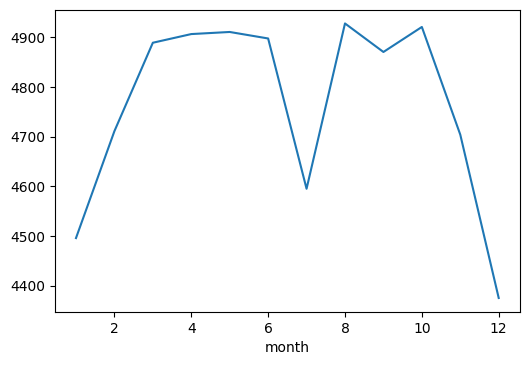

In [16]:
by_month['traffic_volume'].plot.line()

The months with the highest volume on average are [march-june] and [august-actober]<br>
The months with the lowest volumes on avegrage are january, july and december <br>

# Influence of days on traffic volume 

In [17]:
daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek
by_dayofweek = daytime_data.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  

<ipython-input-17-776602669aae>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

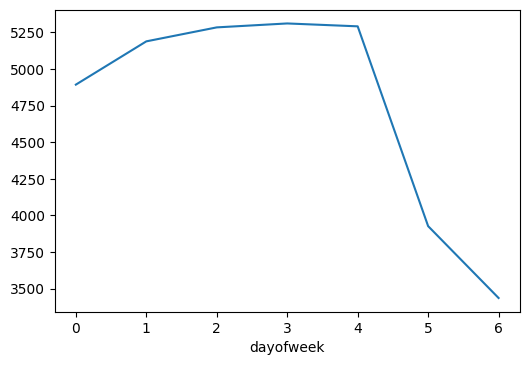

In [18]:
by_dayofweek['traffic_volume'].plot.line()

There is clearly a difference between business days(0 to 4) and weekend(5 and 6). The traffic is heavier on business days. 

# Influence of day hours on traffic volume

Because the weekend will drag dow the average, we will split into business days and week end: 

In [25]:
daytime_data['hour'] = daytime_data['date_time'].dt.hour
bussiness_days = daytime_data.copy()[daytime_data['dayofweek'] <= 4] # 4 == Friday

weekend = daytime_data.copy()[daytime_data['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-25-9a44f97c5548>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



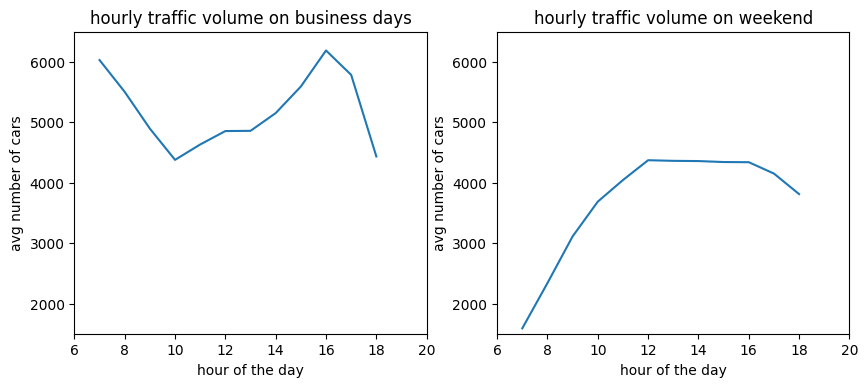

In [39]:
plt.figure(figsize=(10,4))
# for business days
plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.title('hourly traffic volume on business days')
plt.xlabel('hour of the day')
plt.ylabel('avg number of cars')
plt.xlim([6,20])
plt.ylim([1500,6500])


# for weekends
plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('hourly traffic volume on weekend')
plt.xlabel('hour of the day')
plt.ylabel('avg number of cars')
plt.xlim([6,20])
plt.ylim([1500,6500])

plt.show()

On business days, the rush hours are : 6am to 8am and 3pm to 5pm <br>
On weekends, the rush hours are 12am to 4pm. <br>

To sum up all our observations we can say that the traffic is heavy : <br> 
- during the months of [march to june] and [august to actober]...<br>
   - mostly on business days...
       - form [6am to 8am] and [3pm to 5pm] 

# Influence of weather on traffic volume

In [46]:
# First lets look at numerical weather columns

In [44]:
daytime_data.corr()['traffic_volume'][['temp','rain_1h','snow_1h', 'clouds_all']]

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

The weather column with the stronger correlation with traffic volume is the temperature.

(200.0, 350.0)

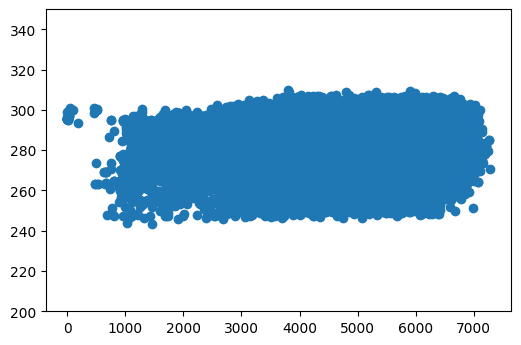

In [71]:
plt.scatter(daytime_data['traffic_volume'], daytime_data['temp'])
plt.ylim([200,350])

The correlation is very low, the temp is not a reliable indicator of heavy traffic. Neither the other numerical weather columns.

In [49]:
# Next, lets look at categorical weather columns

In [52]:
by_weather_main = daytime_data.groupby('weather_main').mean()
by_weather_description = daytime_data.groupby('weather_description').mean()

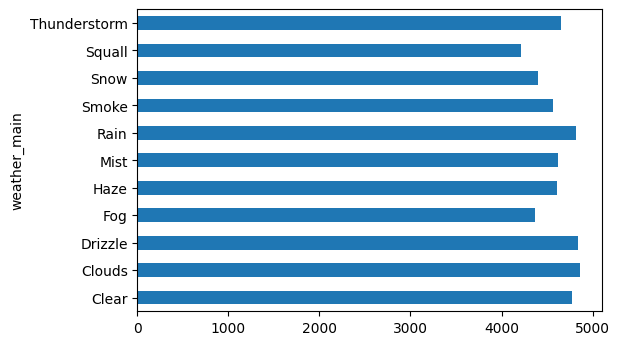

In [73]:
by_weather_main['traffic_volume'].plot.barh()

There is no traffic volume exceding 5000 cars, the traffic is light.There is no heavy traffic indicator in weather_main unique values.

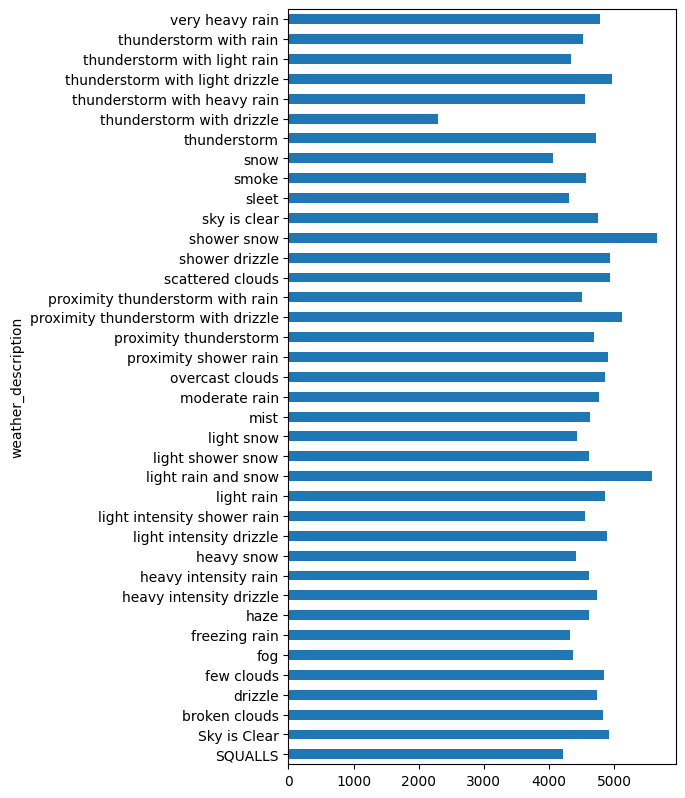

In [83]:
by_weather_description['traffic_volume'].plot.barh(figsize =(5,10))

There is two unique values with a traffic volume of more than 5000 cars : 
- Light rain and snow  
- shower snow
- Proximity thunderstorm with drizzle <br>
We can add them in our list of heavy traffic indicators. It looks conter intuitive : there is a lot of traffic on some bad weather conditions. Given that those weather aren't too bad, maybe people tend to take their car intead of other means of transport.

### Conclusion : 
Finally, we can conclude that the traffic is heavy : <br> 
- during the months of [march to june] and [august to actober]...<br>
   - mostly on business days...
       - form [6am to 8am] and [3pm to 5pm] 
          - during some weather conditions : Light rain and snow , shower snow, Proximity thunderstorm with drizzle  
    